In [4]:
from typing import List, Dict
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib
from pathlib import Path
import matplotlib.pyplot as plt
import load_workload_data as ld
import load_benchmark_data as bn


sns.set(rc={'figure.figsize':(30,40)})
sns.set(font_scale=6)

In [5]:
single_threaded_folder = Path("../data/tpcds_singlethreaded/")
multi_threaded_folder: Path = Path("../data/tpcds_multithreaded/")
sizes_folder: Path = Path("../data/tpcds_singlethreaded/")
high_level_mult: DataFrame = bn.get_high_level(multi_threaded_folder, sizes_folder)
low_level_mult: DataFrame = bn.get_low_level(multi_threaded_folder)
high_level_single: DataFrame = bn.get_high_level(single_threaded_folder, sizes_folder)
low_level_single: DataFrame = bn.get_low_level(single_threaded_folder)
high_level_mult

,benchmark_run_name,Total Runtime (in seconds),avg_throughput,Compression Scheme,with_lto,Clients,multithreaded,float,int,string,Compression Scheme_baseline,Total Runtime (in seconds)_baseline,int_baseline,Runtime Library / Runtime Baseline,size_to_baseline
0,data/tpcds_multithreaded/hyriseBenchmarkTPCDS_...,34.735757,0.392449,CompactVector,False,14,True,3.075083e+09,3.014931e+09,141697194.0,Dictionary,34.140413,3.041191e+09,1.017438,0.991365
1,data/tpcds_multithreaded/hyriseBenchmarkTPCDS_...,34.140413,0.406852,Dictionary,False,14,True,3.075083e+09,3.041191e+09,141697194.0,Dictionary,34.140413,3.041191e+09,1.000000,1.000000
2,data/tpcds_multithreaded/hyriseBenchmarkTPCDS_...,33.802505,0.403987,FrameOfReference,False,14,True,3.075083e+09,3.177409e+09,141697194.0,Dictionary,34.140413,3.041191e+09,0.990102,1.044791
3,data/tpcds_multithreaded/hyriseBenchmarkTPCDS_...,38.410951,0.354670,SIMDCAI,False,14,True,3.075083e+09,2.059901e+09,141697194.0,Dictionary,34.140413,3.041191e+09,1.125087,0.677334
4,data/tpcds_multithreaded/hyriseBenchmarkTPCDS_...,36.798920,0.370248,TurboPFOR,False,14,True,3.075083e+09,2.500211e+09,141697194.0,Dictionary,34.140413,3.041191e+09,1.077870,0.822116
5,data/tpcds_multithreaded/hyriseBenchmarkTPCDS_...,36.180870,0.376647,TurboPFOR_bitpacking,False,14,True,3.075083e+09,2.497612e+09,141697194.0,Dictionary,34.140413,3.041191e+09,1.059767,0.821261
6,data/tpcds_multithreaded/hyriseBenchmarkTPCDS_...,33.674300,0.406003,Unencoded,False,14,True,3.075083e+09,5.500975e+09,141697194.0,Dictionary,34.140413,3.041191e+09,0.986347,1.808823
7,data/tpcds_multithreaded/hyriseBenchmarkTPCDS_...,50.388032,0.540247,CompactVector,False,28,True,3.075083e+09,3.014931e+09,141697194.0,Dictionary,48.781150,3.041191e+09,1.032941,0.991365
8,data/tpcds_multithreaded/hyriseBenchmarkTPCDS_...,48.781150,0.569414,Dictionary,False,28,True,3.075083e+09,3.041191e+09,141697194.0,Dictionary,48.781150,3.041191e+09,1.000000,1.000000
9,data/tpcds_multithreaded/hyriseBenchmarkTPCDS_...,48.999884,0.557085,FrameOfReference,False,28,True,3.075083e+09,3.177409e+09,141697194.0,Dictionary,48.781150,3.041191e+09,1.004484,1.044791


## Runtime

In [6]:
only_28_clients: DataFrame = low_level_mult[low_level_mult[bn.CLIENTS] == 28]
single_with_unencoded_baseline: DataFrame = bn.get_relative_to_baseline_low_level(low_level_single, baseline="Unencoded")
multi_with_unencoded_baseline: DataFrame = bn.get_relative_to_baseline_low_level(only_28_clients, baseline="Unencoded")
sns.catplot(data=only_28_clients, kind="bar", x=bn.QUERY_NAME, y=bn.AVG_DURATION, hue=bn.LIBRARY_NAME, height=90, aspect=2)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Dictionary'),
  Text(1, 0, 'FrameOfReference'),
  Text(2, 0, 'CompactVector'),
  Text(3, 0, 'TurboPFOR'),
  Text(4, 0, 'TurboPFOR_bitpacking'),
  Text(5, 0, 'Unencoded'),
  Text(6, 0, 'SIMDCAI')])

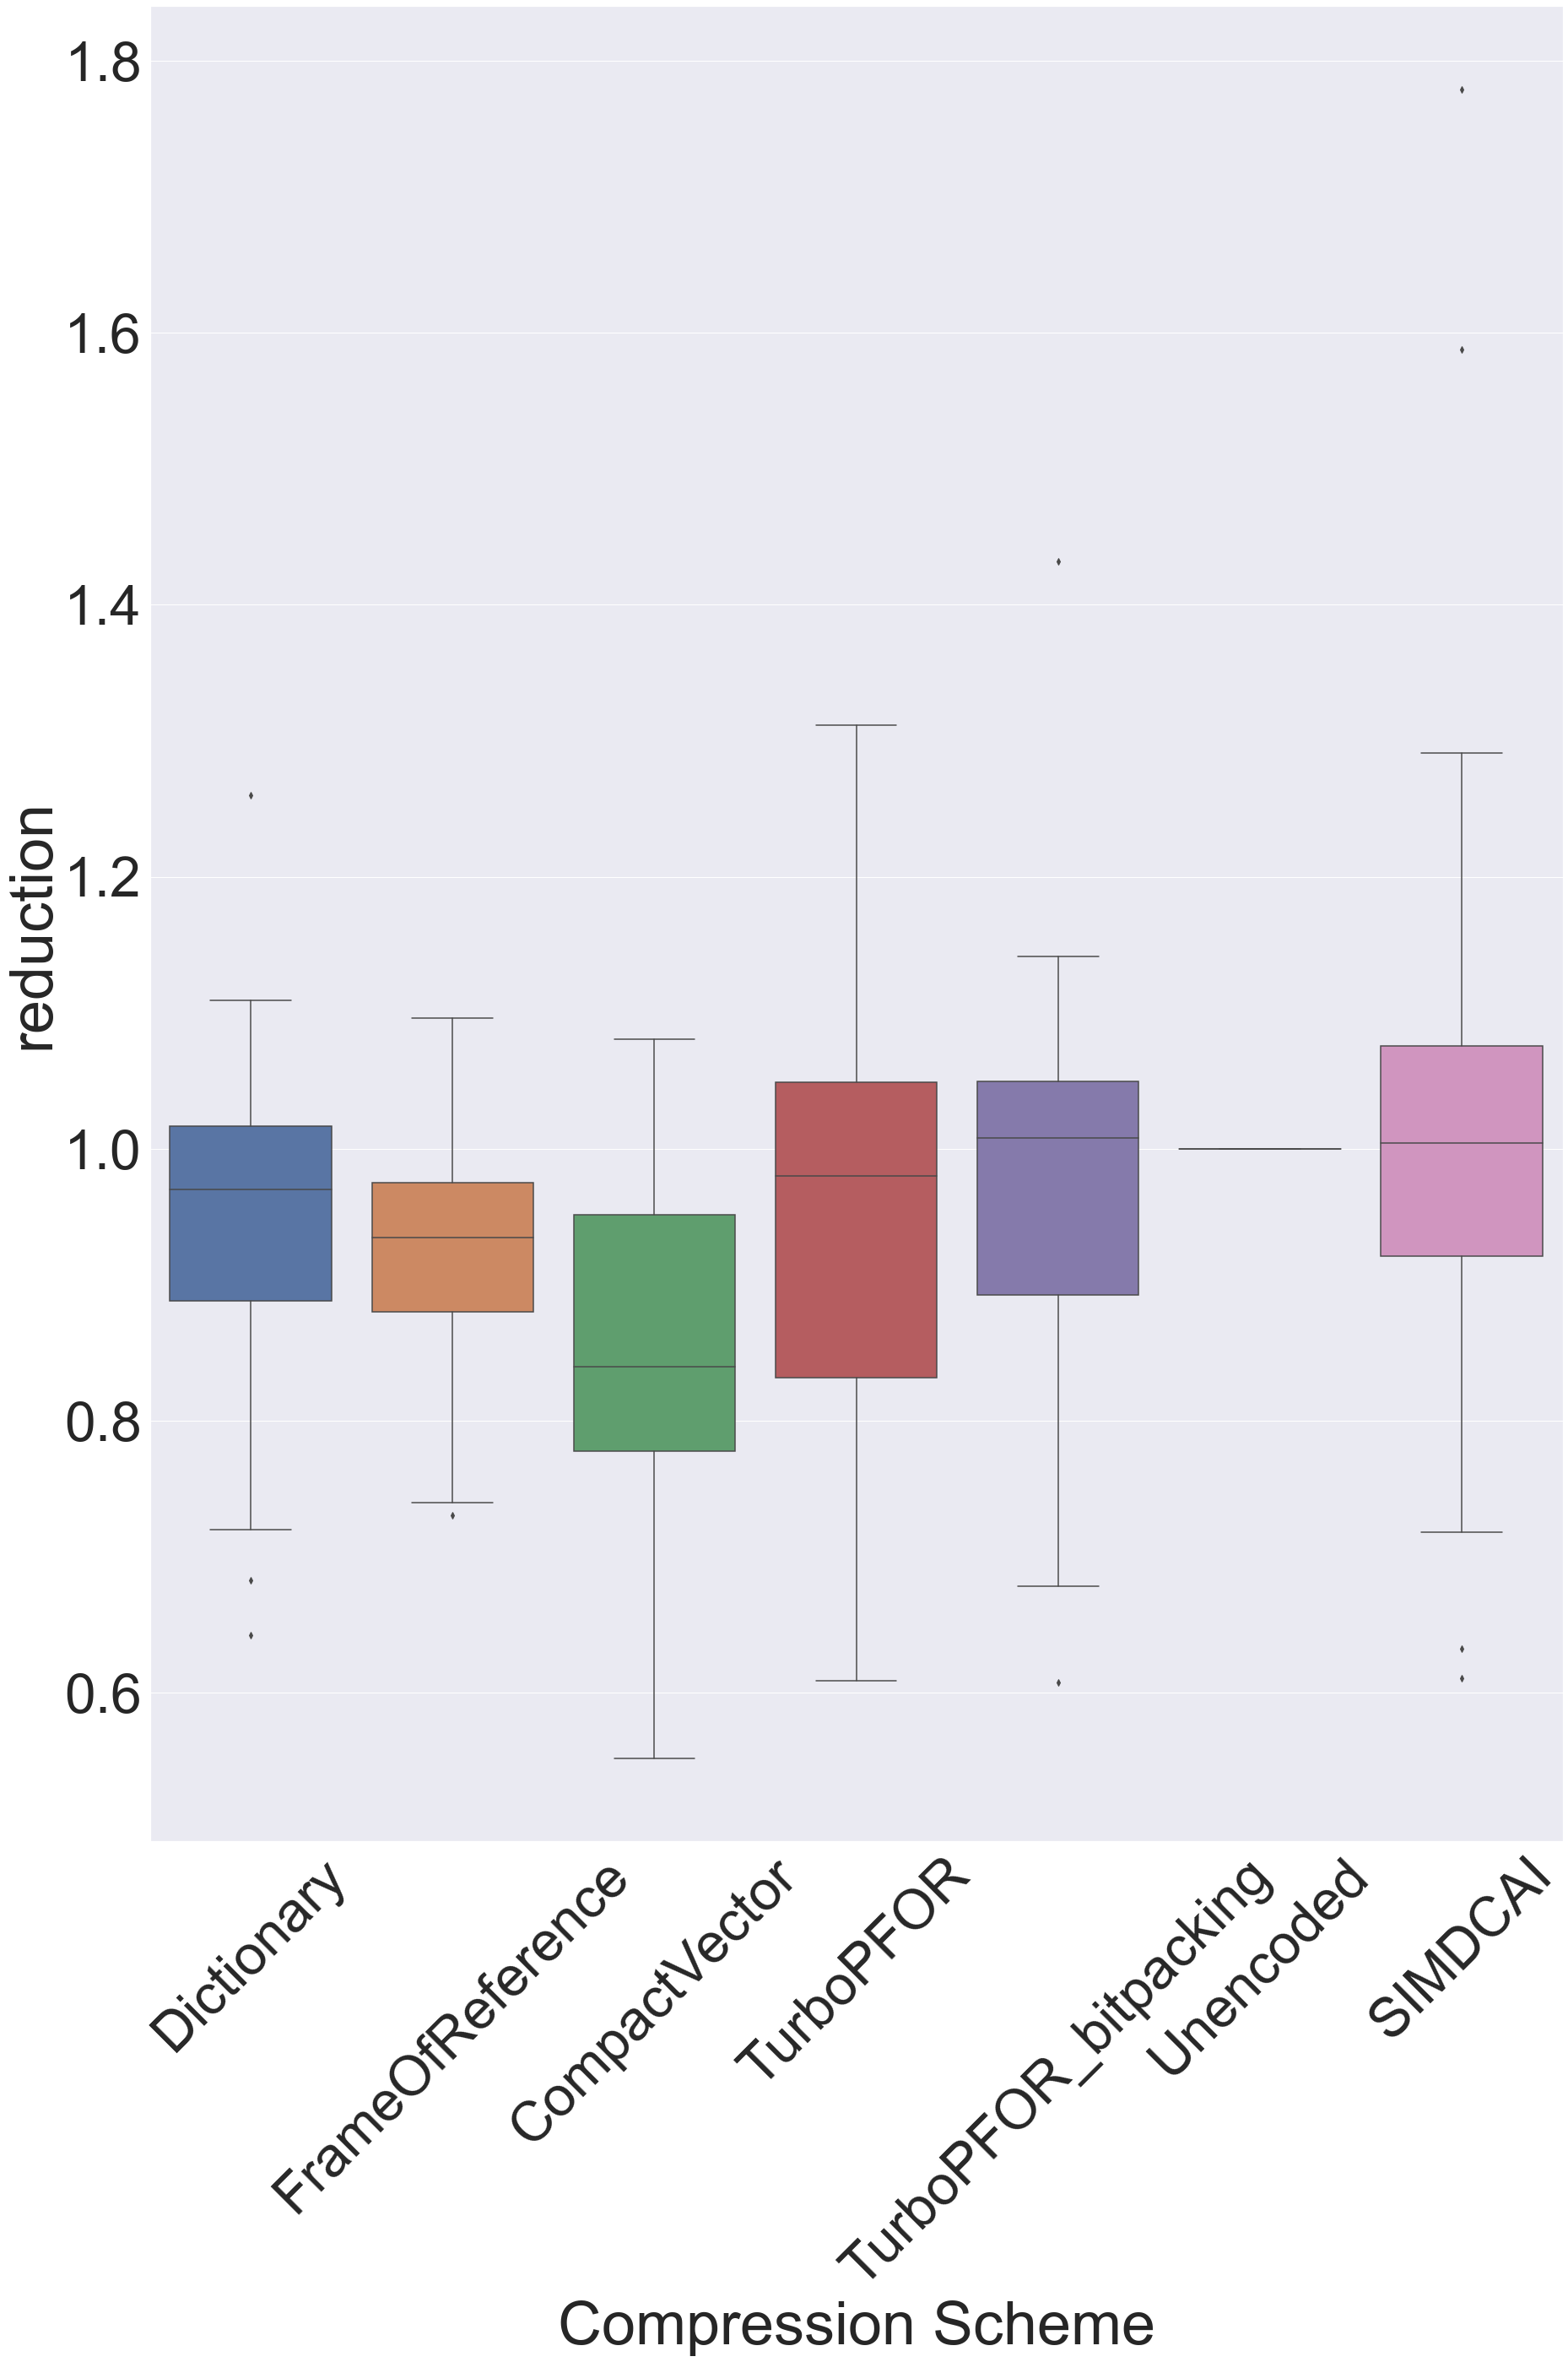

In [7]:
columns_to_merge: List[str] = [bn.QUERY_NAME, bn.LIBRARY_NAME, bn.RUNTIME_TO_BASELINE]
combined: DataFrame = single_with_unencoded_baseline.merge(multi_with_unencoded_baseline[columns_to_merge], on=[bn.LIBRARY_NAME, bn.QUERY_NAME])
combined[bn.REDUCTION] = [multi / single for single, multi
                         in zip(combined[f"{bn.RUNTIME_TO_BASELINE}_x"],
                                combined[f"{bn.RUNTIME_TO_BASELINE}_y"])]
sns.boxplot(data=combined, x=bn.LIBRARY_NAME, y=bn.REDUCTION)
plt.xticks(rotation=45)

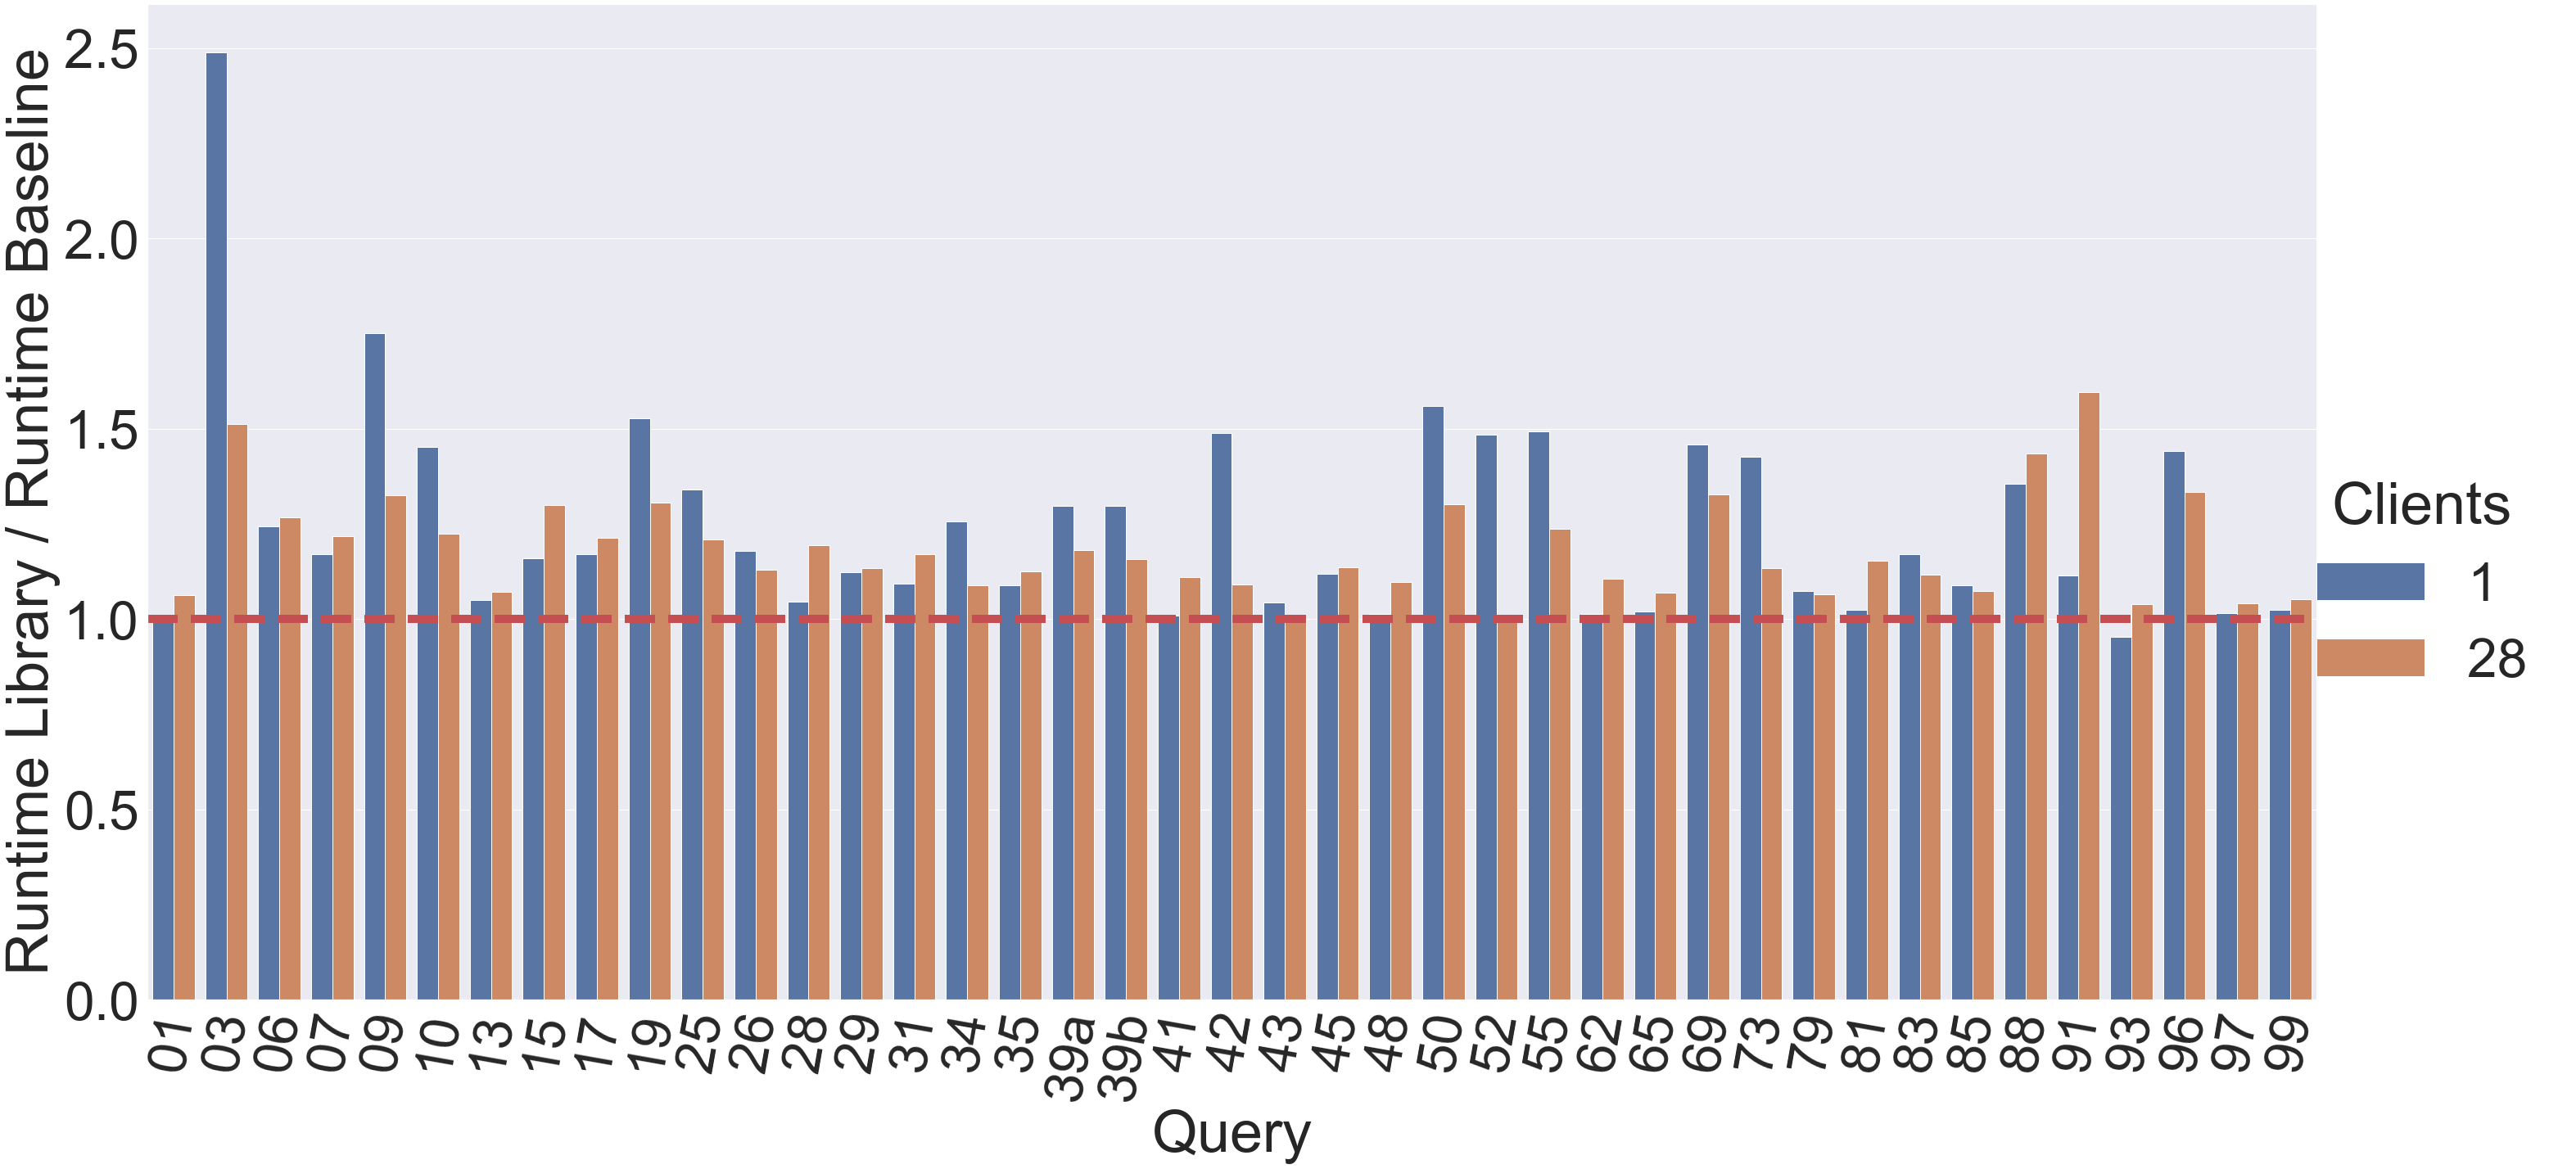

In [8]:
# Single vs. Multithreaded
appended: DataFrame = single_with_unencoded_baseline.append(multi_with_unencoded_baseline)
only_bitpacking: DataFrame = appended[appended[bn.LIBRARY_NAME] == "TurboPFOR_bitpacking"]
sns.catplot(data=only_bitpacking, x=bn.QUERY_NAME, y=bn.RUNTIME_TO_BASELINE, hue=bn.CLIENTS, kind="bar", height=20, aspect=2)
plt.xticks(rotation=80)
plt.axhline(y=1, color='r', linewidth=10, linestyle='--')
plt.savefig("visualizations/single_multithreaded.svg", bbox_inches="tight")

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'CompactVector'),
  Text(1, 0, 'Dictionary'),
  Text(2, 0, 'FrameOfReference'),
  Text(3, 0, 'SIMDCAI'),
  Text(4, 0, 'TurboPFOR'),
  Text(5, 0, 'TurboPFOR_bitpacking'),
  Text(6, 0, 'Unencoded')])

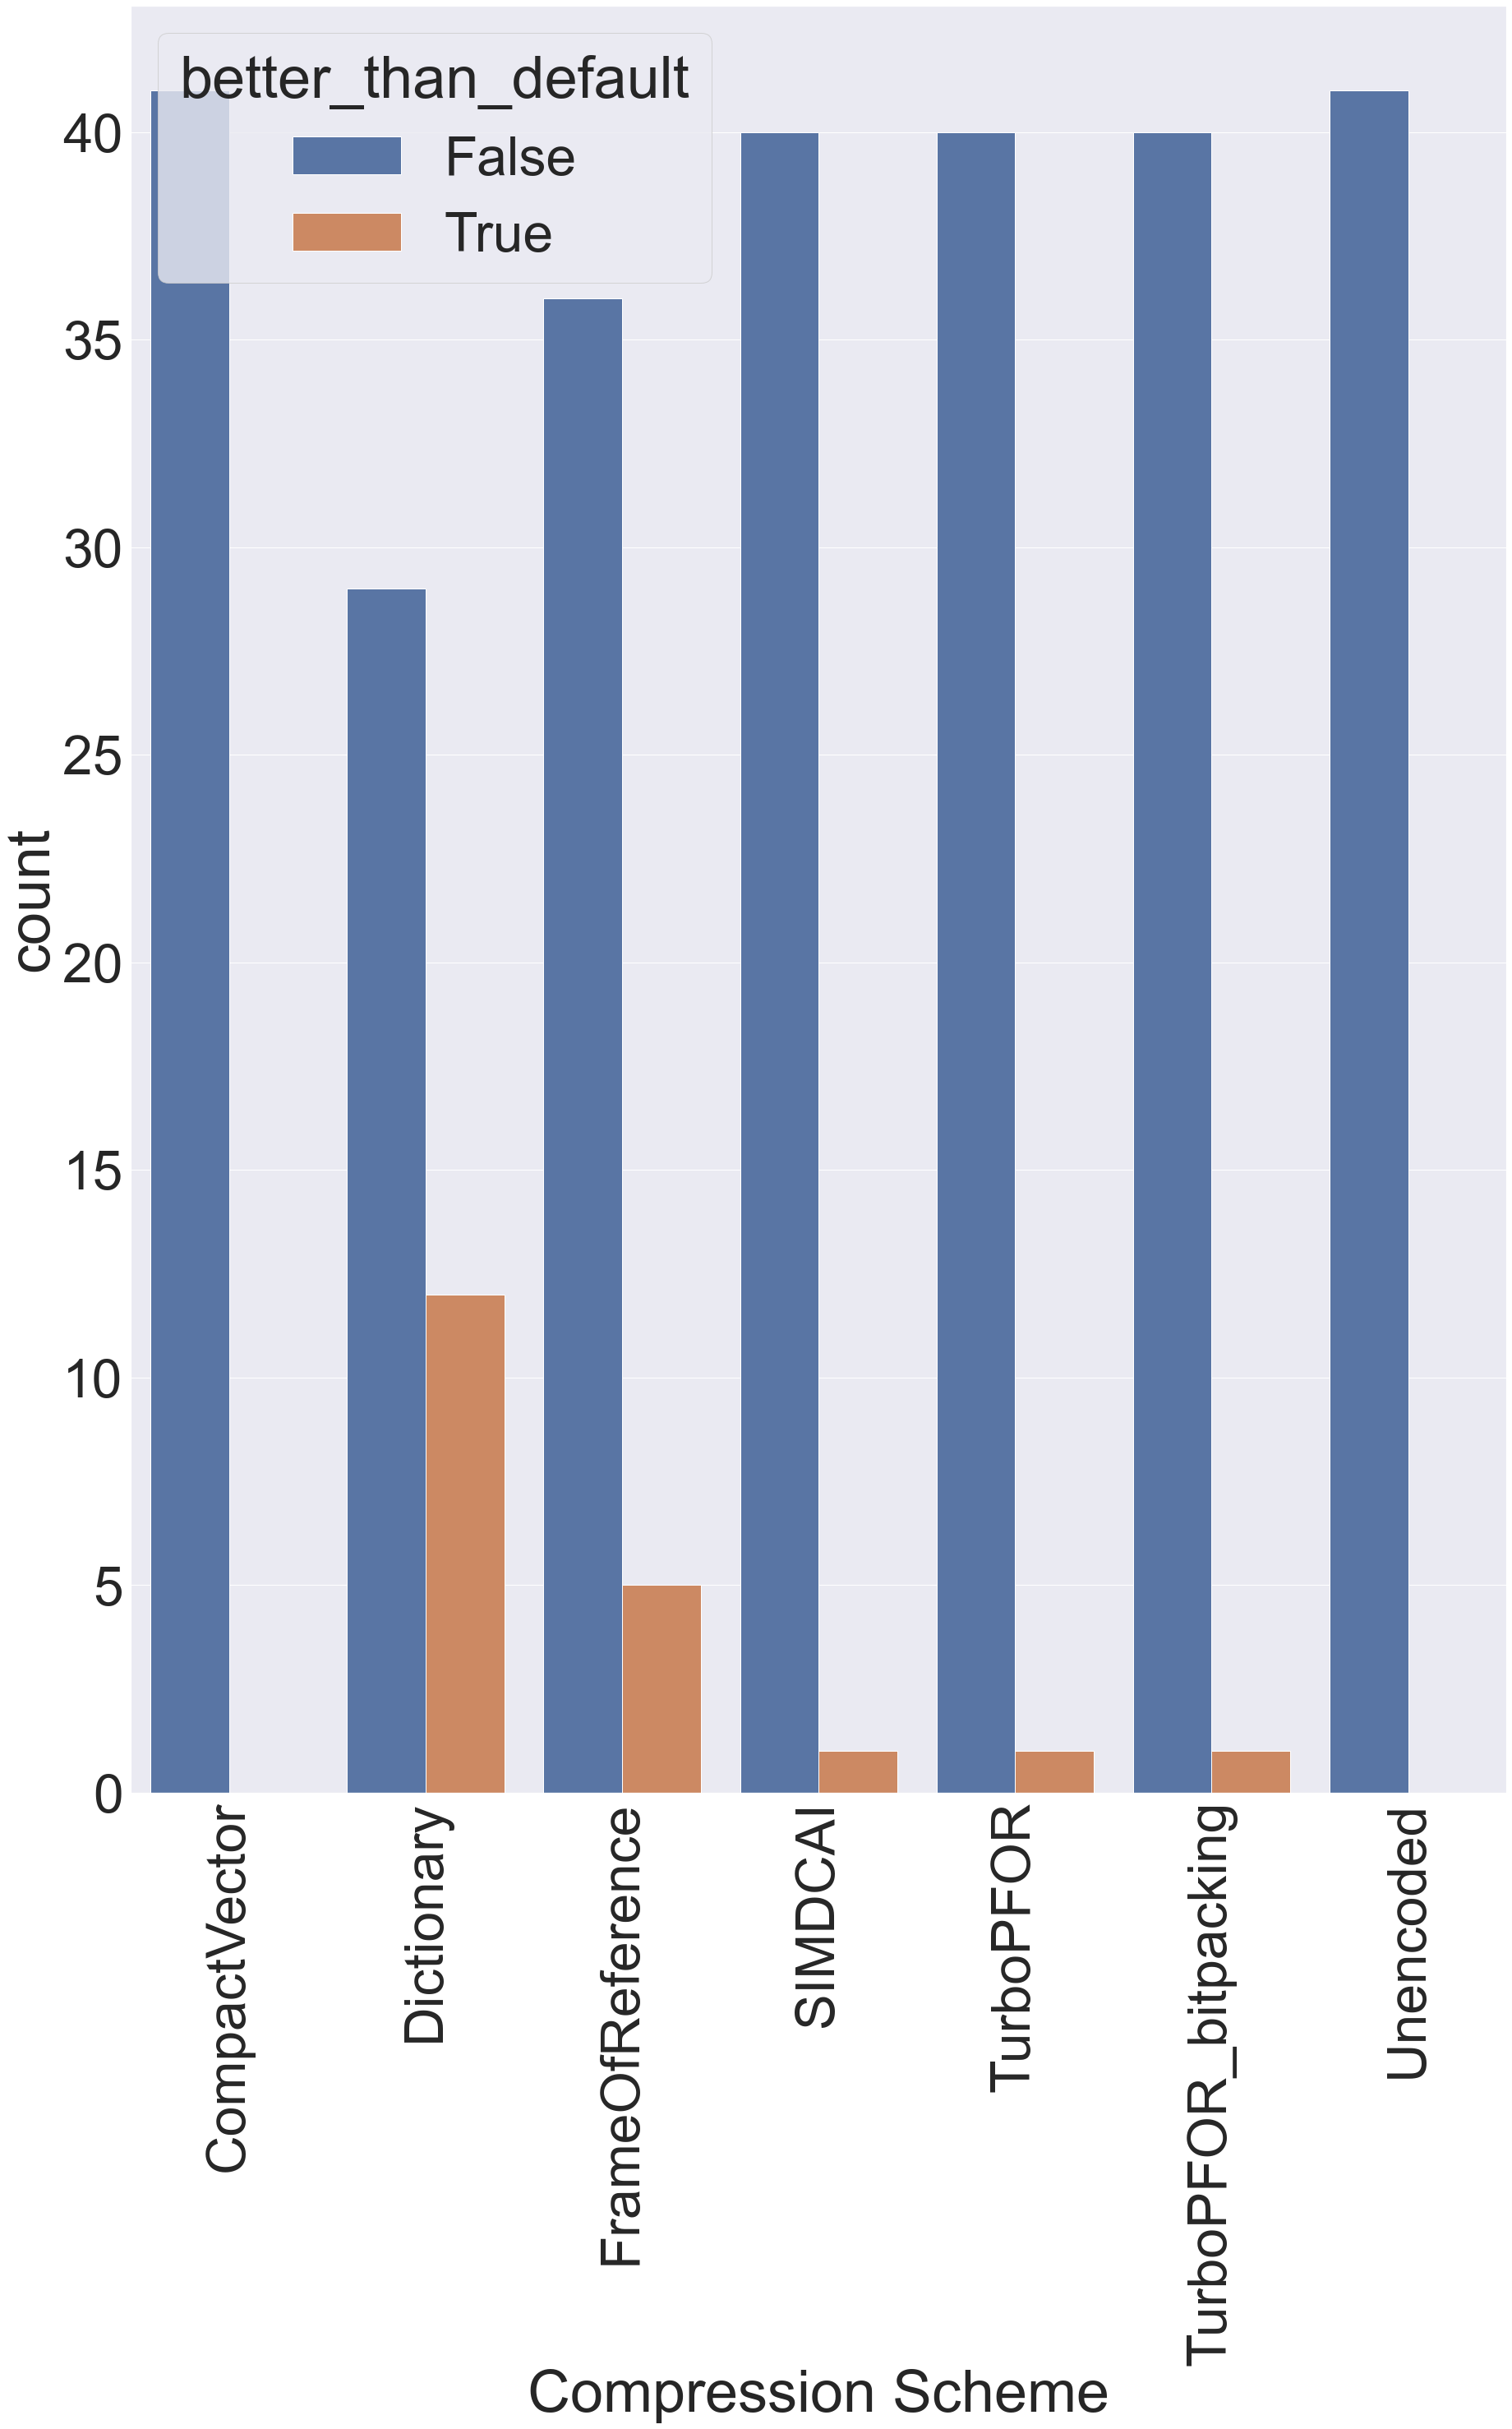

In [9]:
is_better_single: DataFrame = single_with_unencoded_baseline.copy()
is_better_multi: DataFrame = multi_with_unencoded_baseline.copy()
is_better_single[bn.BETTER_THAN_DEFAULT] = [rel_runtime < 1 for rel_runtime in is_better_single[bn.RUNTIME_TO_BASELINE]]
is_better_multi[bn.BETTER_THAN_DEFAULT] = [rel_runtime < 1 for rel_runtime in is_better_multi[bn.RUNTIME_TO_BASELINE]]
order: List[str] = sorted(is_better_single[bn.LIBRARY_NAME].drop_duplicates())
sns.countplot(data=is_better_single, x=bn.LIBRARY_NAME, hue=bn.BETTER_THAN_DEFAULT, order=order)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'CompactVector'),
  Text(1, 0, 'Dictionary'),
  Text(2, 0, 'FrameOfReference'),
  Text(3, 0, 'SIMDCAI'),
  Text(4, 0, 'TurboPFOR'),
  Text(5, 0, 'TurboPFOR_bitpacking'),
  Text(6, 0, 'Unencoded')])

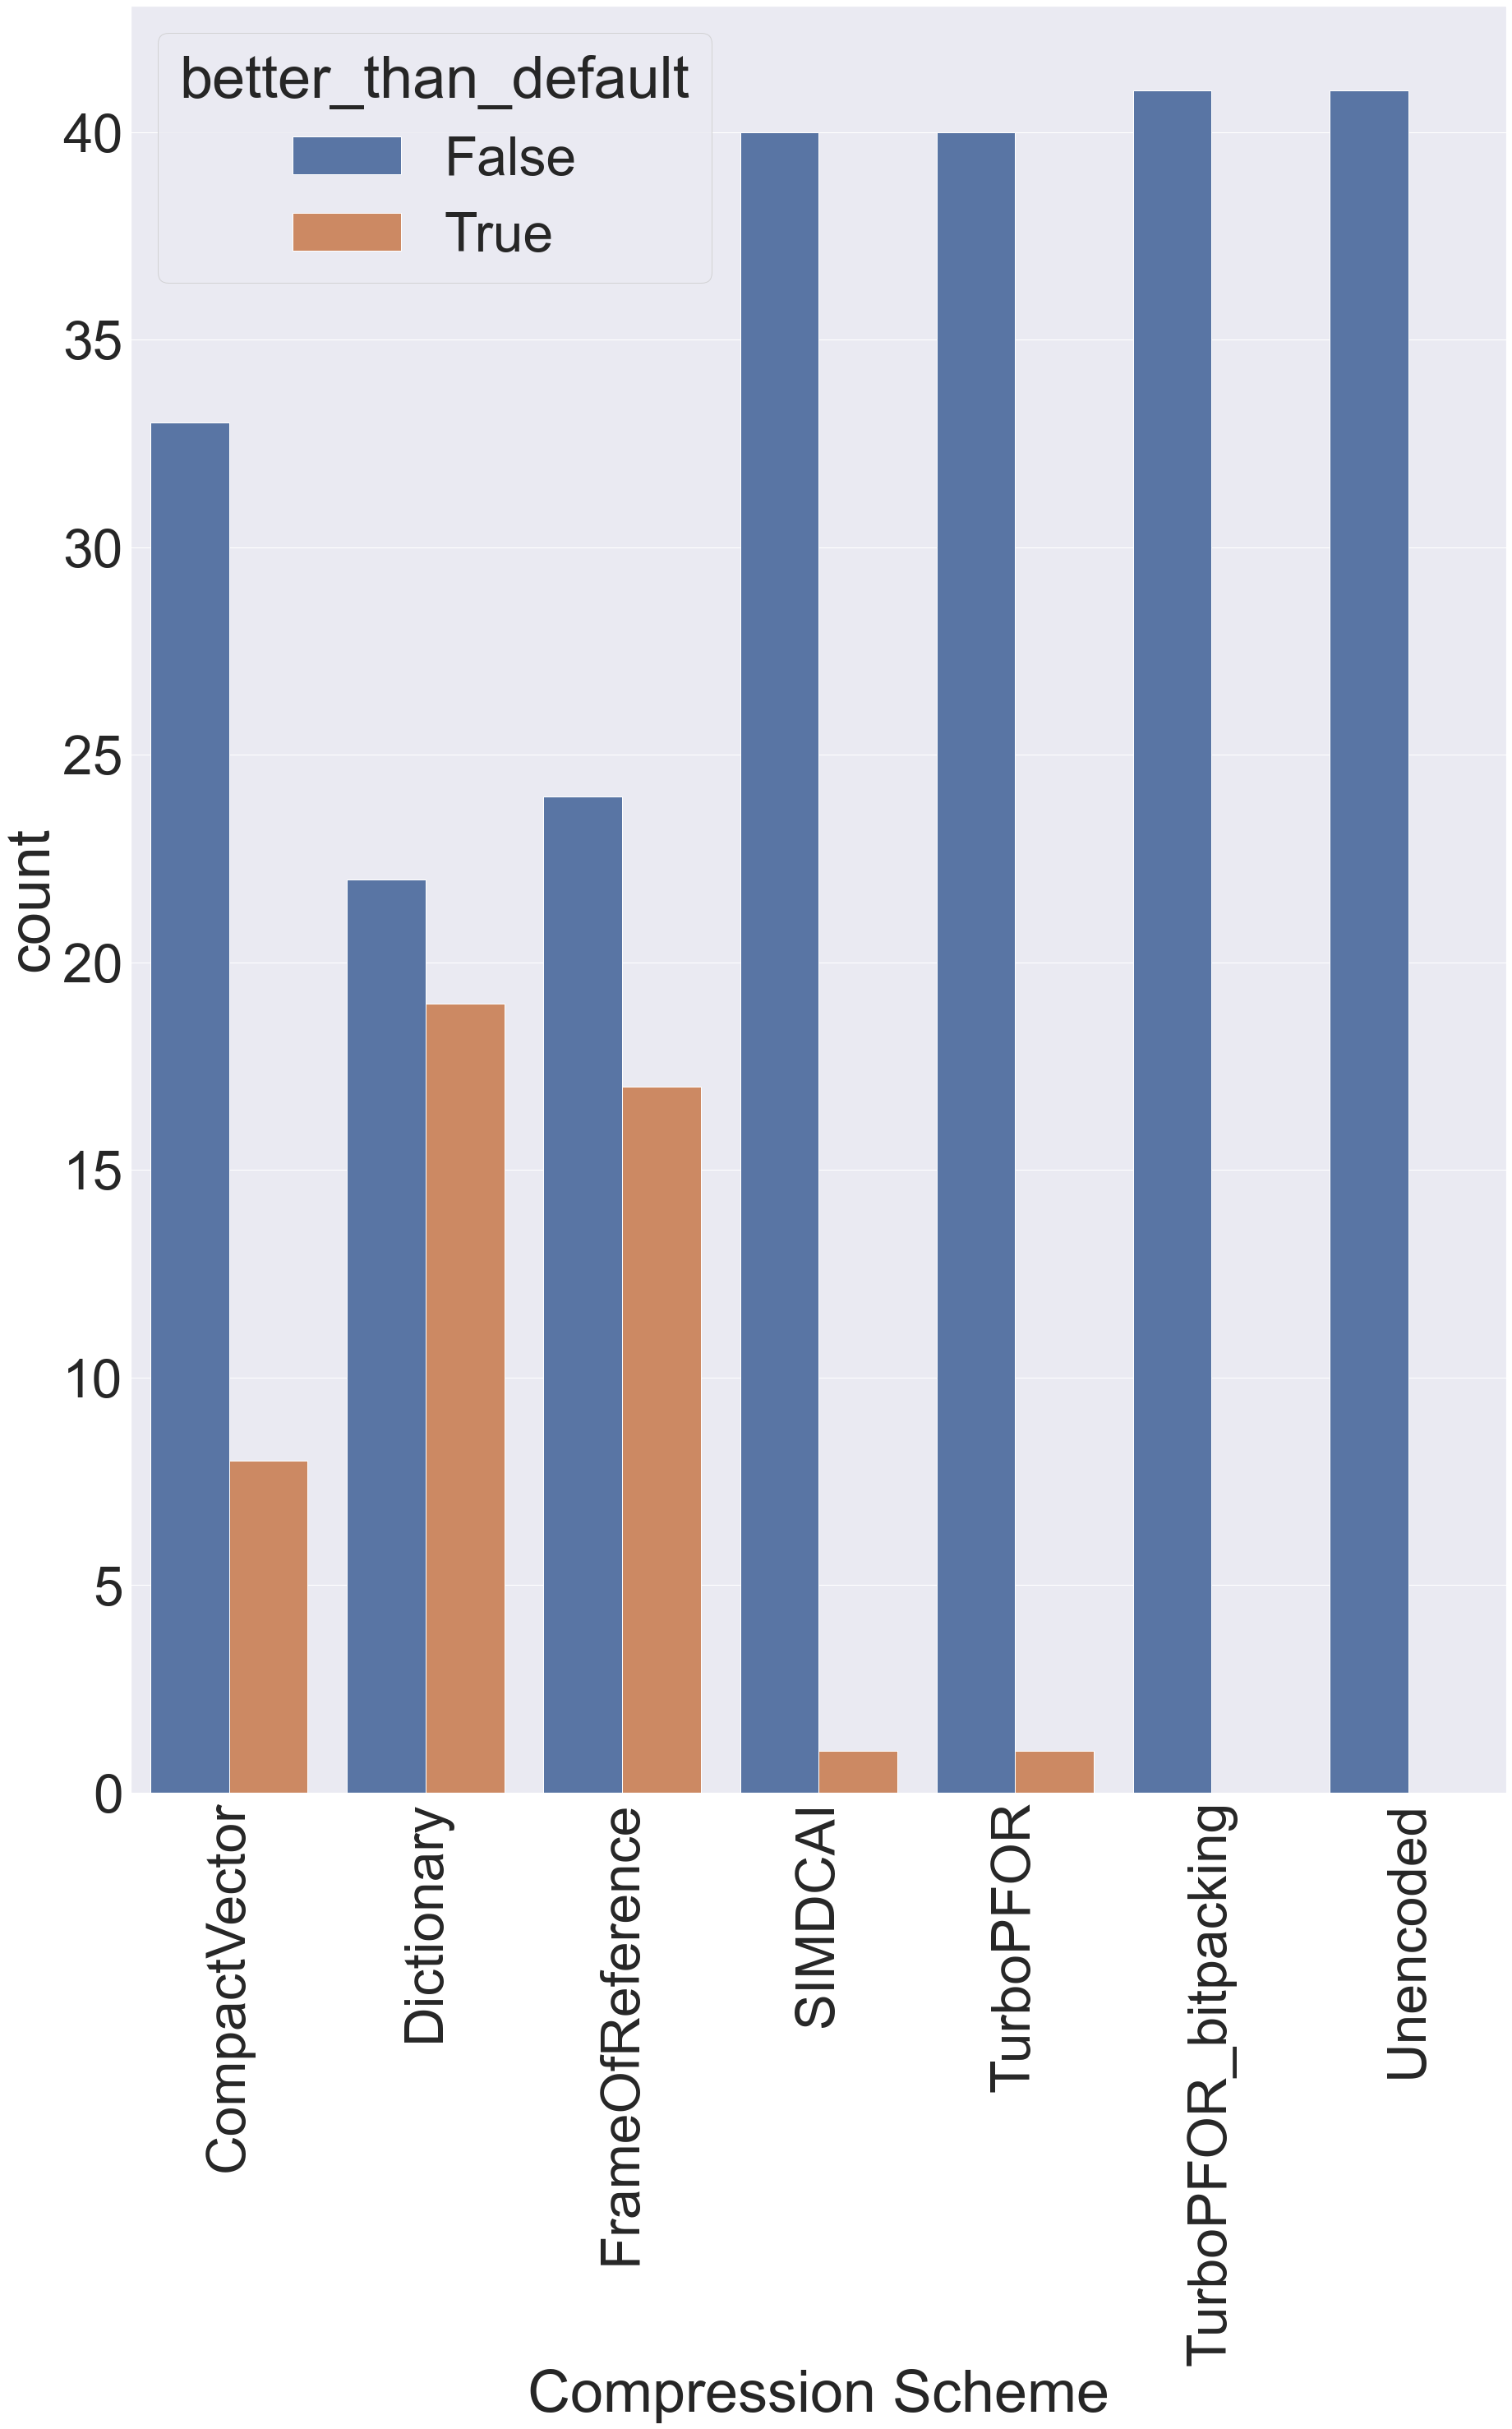

In [10]:
sns.countplot(data=is_better_multi, x=bn.LIBRARY_NAME, hue=bn.BETTER_THAN_DEFAULT, order=order)
plt.xticks(rotation=90)

In [11]:
integer_compressed: DataFrame = bn.load_sizes(sizes_folder / "sizes_Dictionary.txt")
dictionary: DataFrame = bn.load_sizes(sizes_folder / "sizes_Unencoded.txt")
columns_to_merge: List[str] = ["table_name", "chunk_id", "column_id", bn.SIZE_IN_BYTES]
merged: DataFrame = integer_compressed.merge(dictionary[columns_to_merge], on=["table_name", "chunk_id", "column_id"],
                                             suffixes=("","_baseline"))
merged

,table_name,chunk_id,column_id,column_name,Data Type,distinct_value_count,encoding_type,vector_compression_type,Size (in Bytes),point_accesses,sequential_accesses,monotonic_accesses,random_accesses,dictionary_accesses,Size (in GB),Size (in Bytes)_baseline
0,catalog_page,0,0,cp_catalog_page_sk,int,12000,Dictionary,FixedSize2ByteAligned,72096,0,12000,0,0,12000,0.000072,48184
1,catalog_page,0,1,cp_catalog_page_id,string,12000,Dictionary,FixedSize2ByteAligned,708128,0,12000,0,0,12000,0.000708,708128
2,catalog_page,0,2,cp_start_date_sk,int,91,Dictionary,FixedSize1ByteAligned,12460,0,12000,0,0,12000,0.000012,49688
3,catalog_page,0,3,cp_end_date_sk,int,97,Dictionary,FixedSize1ByteAligned,12484,0,12000,0,0,12000,0.000012,49688
4,catalog_page,0,4,cp_department,string,1,Dictionary,FixedSize1ByteAligned,12168,0,12000,0,0,12000,0.000012,12168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31946,web_returns,10,19,wr_return_ship_cost,float,37214,Dictionary,FixedSize2ByteAligned,276686,0,63867,0,0,63867,0.000277,276686
31947,web_returns,10,20,wr_refunded_cash,float,40632,Dictionary,FixedSize2ByteAligned,290358,0,63867,0,310,63867,0.000290,290358
31948,web_returns,10,21,wr_reversed_charge,float,31701,Dictionary,FixedSize2ByteAligned,254634,0,63867,0,0,63867,0.000255,254634
31949,web_returns,10,22,wr_account_credit,float,31384,Dictionary,FixedSize2ByteAligned,253366,0,63867,0,0,63867,0.000253,253366


In [12]:
# Get DB Columns where Int Compression Had the most impact
sizes_per_column = merged.groupby(["table_name", "column_name", bn.DATA_TYPE], as_index=False)[bn.SIZE_IN_BYTES, f"{bn.SIZE_IN_BYTES}_baseline"].sum()
sizes_per_column["compression"] = [x / y
                                     for x, y in zip(sizes_per_column[bn.SIZE_IN_BYTES],
                                                     sizes_per_column[f"{bn.SIZE_IN_BYTES}_baseline"])]
only_int_columns = sizes_per_column[sizes_per_column[bn.DATA_TYPE] == "int"]
only_int_columns

<ipython-input-12-1aea552730d8>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sizes_per_column = merged.groupby(["table_name", "column_name", bn.DATA_TYPE], as_index=False)[bn.SIZE_IN_BYTES, f"{bn.SIZE_IN_BYTES}_baseline"].sum()


,table_name,column_name,Data Type,Size (in Bytes),Size (in Bytes)_baseline,compression
1,call_center,cc_call_center_sk,int,216,280,0.771429
4,call_center,cc_closed_date_sk,int,120,288,0.416667
5,call_center,cc_company,int,144,288,0.500000
9,call_center,cc_division,int,144,288,0.500000
11,call_center,cc_employees,int,196,288,0.680556
...,...,...,...,...,...,...
401,web_site,web_close_date_sk,int,194,360,0.538889
402,web_site,web_company_id,int,162,360,0.450000
411,web_site,web_mkt_id,int,162,360,0.450000
413,web_site,web_open_date_sk,int,222,360,0.616667


In [13]:
dictionary.groupby([bn.DATA_TYPE], as_index=False)[bn.SIZE_IN_BYTES].sum()

,Data Type,Size (in Bytes)
0,float,3075083052
1,int,5500974996
2,string,141697194


In [14]:
bn.get_relative_to_baseline_high_level(high_level_single, baseline="Unencoded")

,benchmark_run_name,Total Runtime (in seconds),avg_throughput,Compression Scheme,with_lto,Clients,multithreaded,float,int,string,Runtime Library / Runtime Baseline,size_to_baseline,Compression Scheme_baseline,Total Runtime (in seconds)_baseline,int_baseline
0,data/tpcds_singlethreaded/hyriseBenchmarkTPCDS...,33.327555,2.517298,CompactVector,False,1,False,3.075083e+09,3.014931e+09,141697194.0,1.150989,0.548072,Unencoded,28.955592,5.500975e+09
1,data/tpcds_singlethreaded/hyriseBenchmarkTPCDS...,30.854252,3.007335,Dictionary,False,1,False,3.075083e+09,3.041191e+09,141697194.0,1.065571,0.552846,Unencoded,28.955592,5.500975e+09
2,data/tpcds_singlethreaded/hyriseBenchmarkTPCDS...,30.546465,2.915970,FrameOfReference,False,1,False,3.075083e+09,3.177409e+09,141697194.0,1.054942,0.577608,Unencoded,28.955592,5.500975e+09
3,data/tpcds_singlethreaded/hyriseBenchmarkTPCDS...,36.095560,2.417401,SIMDCAI,False,1,False,3.075083e+09,2.059901e+09,141697194.0,1.246583,0.374461,Unencoded,28.955592,5.500975e+09
4,data/tpcds_singlethreaded/hyriseBenchmarkTPCDS...,32.843624,2.667507,TurboPFOR_bitpacking,False,1,False,3.075083e+09,2.497612e+09,141697194.0,1.134276,0.454031,Unencoded,28.955592,5.500975e+09
5,data/tpcds_singlethreaded/hyriseBenchmarkTPCDS...,34.954348,2.425201,TurboPFOR,False,1,False,3.075083e+09,2.500211e+09,141697194.0,1.207171,0.454503,Unencoded,28.955592,5.500975e+09
6,data/tpcds_singlethreaded/hyriseBenchmarkTPCDS...,28.955592,3.262222,Unencoded,False,1,False,3.075083e+09,5.500975e+09,141697194.0,1.000000,1.000000,Unencoded,28.955592,5.500975e+09


In [15]:
bn.get_relative_to_baseline_high_level(high_level_mult[high_level_mult[bn.CLIENTS] == 28], baseline="Unencoded")

,benchmark_run_name,Total Runtime (in seconds),avg_throughput,Compression Scheme,with_lto,Clients,multithreaded,float,int,string,Runtime Library / Runtime Baseline,size_to_baseline,Compression Scheme_baseline,Total Runtime (in seconds)_baseline,int_baseline
0,data/tpcds_multithreaded/hyriseBenchmarkTPCDS_...,50.388032,0.540247,CompactVector,False,28,True,3.075083e+09,3.014931e+09,141697194.0,1.031443,0.548072,Unencoded,48.851988,5.500975e+09
1,data/tpcds_multithreaded/hyriseBenchmarkTPCDS_...,48.781150,0.569414,Dictionary,False,28,True,3.075083e+09,3.041191e+09,141697194.0,0.998550,0.552846,Unencoded,48.851988,5.500975e+09
2,data/tpcds_multithreaded/hyriseBenchmarkTPCDS_...,48.999884,0.557085,FrameOfReference,False,28,True,3.075083e+09,3.177409e+09,141697194.0,1.003027,0.577608,Unencoded,48.851988,5.500975e+09
3,data/tpcds_multithreaded/hyriseBenchmarkTPCDS_...,60.864931,0.447244,SIMDCAI,False,28,True,3.075083e+09,2.059901e+09,141697194.0,1.245905,0.374461,Unencoded,48.851988,5.500975e+09
4,data/tpcds_multithreaded/hyriseBenchmarkTPCDS_...,56.950483,0.477756,TurboPFOR,False,28,True,3.075083e+09,2.500211e+09,141697194.0,1.165776,0.454503,Unencoded,48.851988,5.500975e+09
5,data/tpcds_multithreaded/hyriseBenchmarkTPCDS_...,55.156229,0.493460,TurboPFOR_bitpacking,False,28,True,3.075083e+09,2.497612e+09,141697194.0,1.129048,0.454031,Unencoded,48.851988,5.500975e+09
6,data/tpcds_multithreaded/hyriseBenchmarkTPCDS_...,48.851988,0.559663,Unencoded,False,28,True,3.075083e+09,5.500975e+09,141697194.0,1.000000,1.000000,Unencoded,48.851988,5.500975e+09
